In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [2]:
start_date = datetime.datetime(2014,1,1)
end_date   = datetime.datetime(2019,7,9)
bac_df = pdr.get_data_yahoo('BAC', start='2014-01-01') 
bac_df.drop(['Adj Close'],axis =1 ,inplace =True)
bac_df = bac_df.resample('W').last()

In [3]:
bac_df['5-Day'] = bac_df['Close'].rolling(5).mean().shift()

In [4]:
bac_df.head(10)

,High,Low,Open,Close,Volume,5-Day
Date,,,,,,
2014-01-05,16.500000,16.230000,16.270000,16.410000,129921800.0,NaN
2014-01-12,16.790001,16.610001,16.750000,16.770000,87454100.0,NaN
2014-01-19,17.219999,16.990000,17.200001,17.010000,96232200.0,NaN
2014-01-26,16.719999,16.450001,16.670000,16.450001,112899300.0,NaN
2014-02-02,16.980000,16.610001,16.719999,16.750000,139432100.0,NaN
2014-02-09,16.879999,16.629999,16.820000,16.820000,122571100.0,16.678
2014-02-16,16.760000,16.650000,16.740000,16.700001,100684300.0,16.760
2014-02-23,16.490000,16.250000,16.290001,16.290001,106236900.0,16.746
2014-03-02,16.650000,16.350000,16.490000,16.530001,126252100.0,16.602


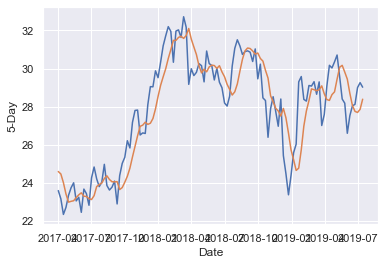

In [5]:
sns.lineplot(x=bac_df.index[-120:], y= bac_df.Close[-120:] )
sns.lineplot(x=bac_df.index[-120:], y= bac_df['5-Day'][-120:] )

In [6]:
bac_df['MAD'] = np.abs(bac_df['Close']-bac_df['5-Day'])

In [7]:
# Mean Percent Error
bac_df['MAPE'] = bac_df['MAD']/bac_df['Close']

In [8]:
print(f"Mean absolute deviation :{bac_df['MAD'].mean()}")

Mean absolute deviation :0.8619929340523734


In [9]:
print(f"Mean Percent Error :{bac_df['MAPE'].mean()}")

Mean Percent Error :0.04127423538239757


In [10]:
bac_df['MSE'] = bac_df['MAD'] **2
MSE = bac_df['MSE'].mean()
RMSE = np.sqrt(MSE)
print(f"Root Mean Squared Error:{RMSE}")

Root Mean Squared Error:1.1467420183000445


In [11]:
bac_df.tail()

,High,Low,Open,Close,Volume,5-Day,MAD,MAPE,MSE
Date,,,,,,,,,
2019-06-16,28.170000,27.780001,27.910000,28.040001,37322100.0,28.058000,0.017999,0.000642,0.000324
2019-06-23,28.549999,28.080000,28.190001,28.120001,69444000.0,27.750000,0.370000,0.013158,0.136900
2019-06-30,29.270000,28.730000,29.010000,29.000000,101856900.0,27.694001,1.305999,0.045034,1.705634
2019-07-07,29.570000,29.150000,29.360001,29.260000,33092000.0,27.858001,1.402000,0.047915,1.965603
2019-07-14,29.400000,28.959999,29.170000,29.020000,40501300.0,28.390001,0.630000,0.021709,0.396900
